## Homework 5

**Note: If this is one of your two late homework submissions, please indicate below; also indicate whether it is your first or second late submission.**

\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_

This homework assignment has **two parts**. In the first, you will practice building a recommender system; in the second, you'll practice training a neural network for image classification. I strongly advise using Lab 8 and Lab 9 for assistance as you work on this assignment. Make sure to **read the entire assignment**.

You also may need to use other functions. I encourage you to make use of available resources (including the Internet) to help you solve these problems. You can also work with your classmates. If you do work together, you must provide the names of those classmates below.

Names of Collaborators (if any): William Mahnke

### Recommender Systems

We'll work with the data in `data/movies.csv` and `data/movie-ratings.csv`. `movies` contains a list of $9,737$ movies and their basic description – title, year of release, and genres, separated by vertical bars (for example, `Comedy|Romance`). `movie-ratings` contains ratings of movies by $610$ users, on a scale from $0$ to $5$.

The data come from this source at Kaggle: <https://www.kaggle.com/datasets/gargmanas/movierecommenderdataset/>

In [ ]:
#%pip install matplotlib
#%pip install seaborn
#%pip install pandas
#%pip install scikit-learn

In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

#### Exercise 1

Read both data files into Python. (You can also use R, if you prefer. If you do use R, I would recommend working with a smaller subset of the data.)

Movie title and year of release are in the same column. Create a new variable that represents year of release, as a four-digit number.

In [3]:
movies = pd.read_csv('data/movies.csv')
movie_ratings = pd.read_csv('data/movie-ratings.csv')

In [4]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
movies['year'] = movies['title'].str[-6:].str.extract(r'\((\d{4})\)')
#movies['title'] = movies['title'].str[:-6]

In [ ]:
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [ ]:
movie_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
pd.merge(movies,movie_ratings,on="movieId",suffixes= [None, "_user"])

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483
...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,184,3.5,1537109545
100833,193585,Flint (2017),Drama,2017,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,184,3.5,1537110021


#### Exercise 2

Create a histogram of year of release. How would you describe the shape of the distribution? When were the most movies released?

In [ ]:
movies['year'] = pd.to_numeric(movies['year'])

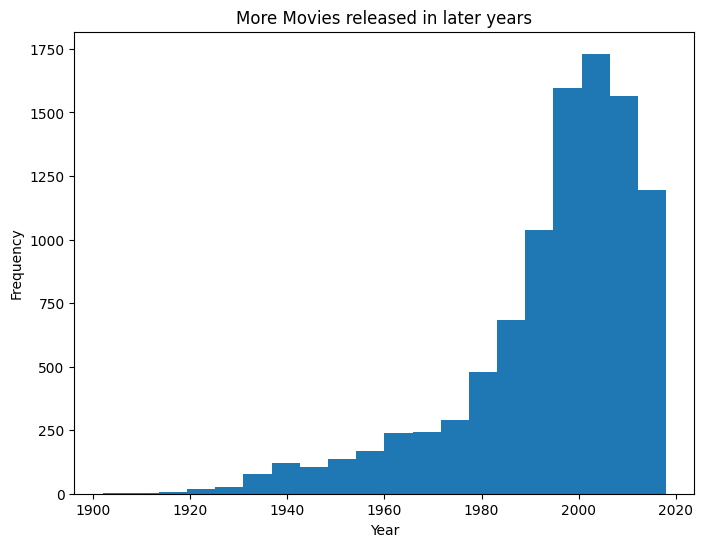

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(movies['year'], bins = 20)

plt.title("More Movies released in later years")
plt.xlabel("Year")
plt.ylabel("Frequency")

plt.show()
plt.close()

The histogram is left-skewed, as most years are concentrated in the later years. This suggests that more films are released in present-day than they were in the past. 

#### Exercise 3

Create a bar chart of the top 10 highest-rated movies.

In [ ]:
movie_ratings['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [ ]:
rating_avgs = movie_ratings.groupby('movieId')['rating'].mean().reset_index()
rating_avgs

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


In [ ]:
movies_df = movies.merge(rating_avgs, on = 'movieId').sort_values(by = 'rating', ascending = False)
movies_df

,movieId,title,genres,year,rating
7638,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,2010.0,5.0
8089,100556,"Act of Killing, The (2012)",Documentary,2012.0,5.0
9065,143031,Jump In! (2007),Comedy|Drama|Romance,2007.0,5.0
9076,143511,Human (2015),Documentary,2015.0,5.0
9078,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,2015.0,5.0
...,...,...,...,...,...
9253,157172,Wizards of the Lost Kingdom II (1989),Action|Fantasy,1989.0,0.5
7536,85334,Hard Ticket to Hawaii (1987),Action|Comedy,1987.0,0.5
6486,53453,Starcrash (a.k.a. Star Crash) (1978),Action|Adventure|Fantasy|Sci-Fi,1978.0,0.5
5200,8494,"Cincinnati Kid, The (1965)",Drama,1965.0,0.5


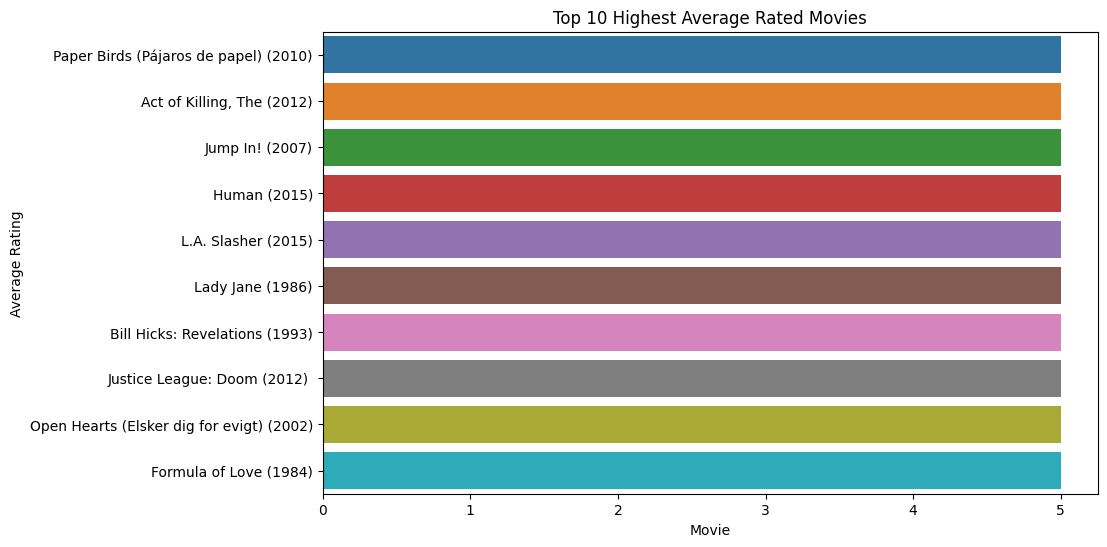

In [ ]:
plt.figure(figsize = (10, 6))
sns.barplot(movies_df[:10], x = 'rating', y = 'title')

plt.title('Top 10 Highest Average Rated Movies')
plt.xlabel('Movie')
plt.ylabel('Average Rating')
plt.show()

#### Exercise 4

Create a variable called `string` that contains the text of each movie's genres, title, and year of release. For example, the value of `string` for `movieID == 3` should be: `"Adventure Children Fantasy Jumanji (1995)"`.

In [ ]:
string = movies.apply(lambda x: ' '.join([word.strip() for word in x['genres'].split('|')]) + ' ' + x['title'], axis = 1)

In [ ]:
#movies["genres"].str.split('|').astype(str)
string

0       Adventure Animation Children Comedy Fantasy To...
1               Adventure Children Fantasy Jumanji (1995)
2                  Comedy Romance Grumpier Old Men (1995)
3           Comedy Drama Romance Waiting to Exhale (1995)
4               Comedy Father of the Bride Part II (1995)
                              ...                        
9737    Action Animation Comedy Fantasy Black Butler: ...
9738    Animation Comedy Fantasy No Game No Life: Zero...
9739                                   Drama Flint (2017)
9740    Action Animation Bungo Stray Dogs: Dead Apple ...
9741           Comedy Andrew Dice Clay: Dice Rules (1991)
Length: 9742, dtype: object

#### Exercise 5

Using the `string` variable, create a tf-idf matrix with `TfidfVectorizer` and `tfv.fit`.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize an instance of TfidfVectorizer
tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words="english")
# min_df = 3: ignore any terms that appear in < 3 documents (WTS: more frequent, filter out niche terms / noise)
# max_features = None : use all terms that meet the min_df criteria
# strip_accents : remove any marked characters
# analyzer : by-word 
# ngram_range = (1,3) : consider unigrams, bigrams, and trigrams (ie sequences of up to 3 words)
# token_pattern : define each word to be a alphanumeric sequence 
# stop_words : remove English stopwords 

In [ ]:
tfv_matrix = tfv.fit_transform(string)

In [ ]:
tfv_matrix

<9742x3446 sparse matrix of type '<class 'numpy.float64'>'
	with 72219 stored elements in Compressed Sparse Row format>

#### Exercise 6

Use the sigmoid kernel from `scikit-learn` to calculate pairwise similarities between all items in your tf-idf matrix.

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)      # Computing sigmoid kernel

In [ ]:
sig

array([[0.761716  , 0.76161873, 0.76160357, ..., 0.76159416, 0.76159897,
        0.76159629],
       [0.76161873, 0.761716  , 0.76160847, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76160357, 0.76160847, 0.761716  , ..., 0.76159416, 0.76159416,
        0.76159744],
       ...,
       [0.76159416, 0.76159416, 0.76159416, ..., 0.761716  , 0.76159416,
        0.76159416],
       [0.76159897, 0.76159416, 0.76159416, ..., 0.76159416, 0.761716  ,
        0.76159416],
       [0.76159629, 0.76159416, 0.76159744, ..., 0.76159416, 0.76159416,
        0.761716  ]])

In [ ]:
movie_indices = pd.Series(movies.index, index = movies['title']).drop_duplicates()

#### Exercise 7

Define a function, `give_recommendation()`, that takes as input the title of a movie and returns the top 10 most similar movies.

In [ ]:
def give_recommendation(title, sig = sig):
    
    idx = movie_indices[title] # Getting index corresponding to original_title

    sig_score = list(enumerate(sig[idx]))  # Getting pairwsie similarity scores 
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11] # extracts the top 10 most similar (exclude index 0 which is title itself)
    rec_indices = [i[0] for i in sig_score]
     
    # Top 10 most similar anime
    rec_dic = {"No" : range(1,11), 
               "Movie Name" : movies["title"].iloc[rec_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Recommendations for {title} viewers :\n")
    
    return dataframe.style.set_properties(**{"background-color": "white","color":"black","border": "1.5px  solid black"})


#### Exercise 8

What movies does your recommender system suggest for a user who likes "Toy Story" (released in 1995)?

In [ ]:
give_recommendation('Toy Story (1995)')

Recommendations for Toy Story (1995) viewers :



,Movie Name
No,
1,Toy Story 2 (1999)
2,Toy Story 3 (2010)
3,Antz (1998)
4,Moana (2016)
5,"Wild, The (2006)"
6,"Tale of Despereaux, The (2008)"
7,"Monsters, Inc. (2001)"
8,Shrek the Third (2007)
9,Turbo (2013)


#### For 234 Students:

#### Exercise 9

Now we'll try making content-based recommendations. Turn the data into a CSR matrix using `scipy.sparse`.

#### Exercise 10

Fit a *k*-nearest neighbors model, using cosine similarity as the distance metric.

#### Exercise 11

Identify which movies your model deems most similar to "GoldenEye" (a James Bond movie, also released in 1995).

### Image Classification

Now we'll work with the data in `data/Animals`. This dataset, intended for animal image classification, [comes from Kaggle.](https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset) It consists of $3,000$ JPEG RGB images, each of which are 256 x 256 pixels, that have been divided into three classes with $1,000$ images in each class. The classes are `cats`, `dogs`, and `snakes`.

In [19]:
#%pip install tensorflow --upgrade
#%pip install os
#%pip install shutil
#%pip install tensorflow numpy==1.24.0

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil
import random

In [4]:
cat_path = 'data/Animals/cats'
dog_path = 'data/Animals/dogs'
snake_path = 'data/Animals/snakes'

In [5]:
cats = os.listdir(cat_path)
dogs = os.listdir(dog_path)
snakes = os.listdir(snake_path)

In [8]:
cats[:5]

['0_0868.jpg', '0_0854.jpg', '0_0840.jpg', '0_0698.jpg', '0_0115.jpg']

#### Exercise 12

Randomly select $150$ images of cats, $150$ images of dogs, and $150$ images of snakes. Set these aside in another directory labeled `test_images` to be your testing set. Using the same approach, randomly select another $150$ images from each class, and set these aside in a `validation_images` directory to be your validation set.

In [10]:
cats_sample = random.sample(cats, 450)
dogs_sample = random.sample(dogs, 450)
snakes_sample = random.sample(snakes, 450)
train_images = cats_sample[:150] + dogs_sample[:150] + snakes_sample[:150]
test_images = cats_sample[150:300] + dogs_sample[150:300] + snakes_sample[150:300]
validation_images = cats_sample[300:] + dogs_sample[300:] + snakes_sample[300:]

In [11]:
train_images[:5]

['0_0553.jpg', '0_0882.jpg', '0_0186.jpg', '0_0127.jpg', '0_0163.jpg']

In [38]:
train_images_path = 'data/Animals/train_images'
test_images_path = 'data/Animals/test_images'
validation_images_path = 'data/Animals/validation_images'

In [81]:
# method to copy images from each of the train/test/validation sets into directories 
def copy_image_to_path(images, dest):
    if not os.path.exists(dest):
        os.makedirs(dest)

    cat_dest = os.path.join(dest, 'cats')
    dog_dest = os.path.join(dest, 'dogs')
    snake_dest = os.path.join(dest, 'snakes')

    for subdir in [cat_dest, dog_dest, snake_dest]:
        if not os.path.exists(subdir):
            os.makedirs(subdir)

    for i in images:
        if i.startswith('0'):
            shutil.copy(os.path.join(cat_path, i), cat_dest)
        elif i.startswith('1'):
            shutil.copy(os.path.join(dog_path, i), dog_dest)
        elif i.startswith('2'):
            shutil.copy(os.path.join(snake_path, i), snake_dest)

In [ ]:
copy_image_to_path(train_images, train_images_path)
copy_image_to_path(test_images, test_images_path)
copy_image_to_path(validation_images, validation_images_path)

#### Exercise 13

Display a random image from each of the three classes in your training set to verify that the data are set up correctly.

In [94]:
def plot_images(path, images):
    # create a figure
    plt.figure(figsize=(12, 12))
    
    subdir = ['cats', 'dogs', 'snakes']

    for i, category in enumerate(subdir):
        path_with_subdir = os.path.join(path, category)
        category_images = [img for img in os.listdir(path_with_subdir) if img in images] # all images in this category

        image_path = os.path.join(path_with_subdir, random.choice(category_images))  # pick random image from this category     
        img = image.load_img(image_path)
        img_arr = image.img_to_array(img)/255.0

        plt.subplot(1, 3, i + 1)  # 1 row, 3 columns, ith image
        plt.imshow(img_arr)
        plt.axis('off')

    plt.show()

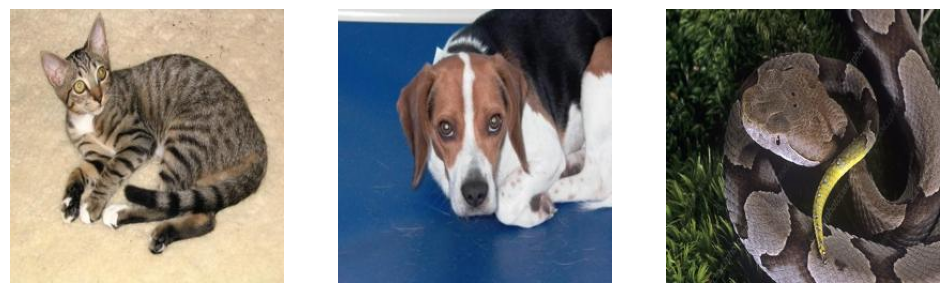

In [95]:
plot_images(train_images_path, train_images)

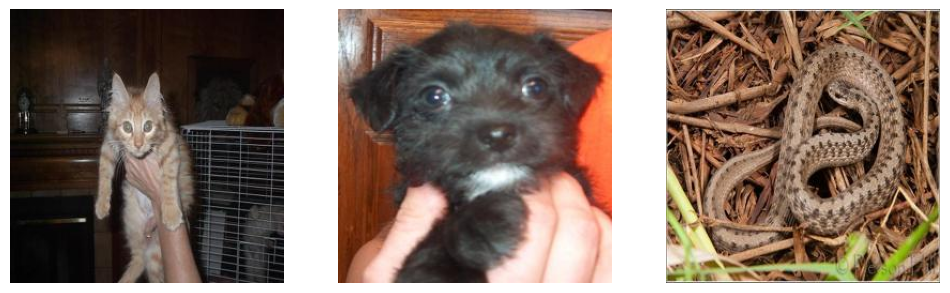

In [96]:
plot_images(test_images_path, test_images)

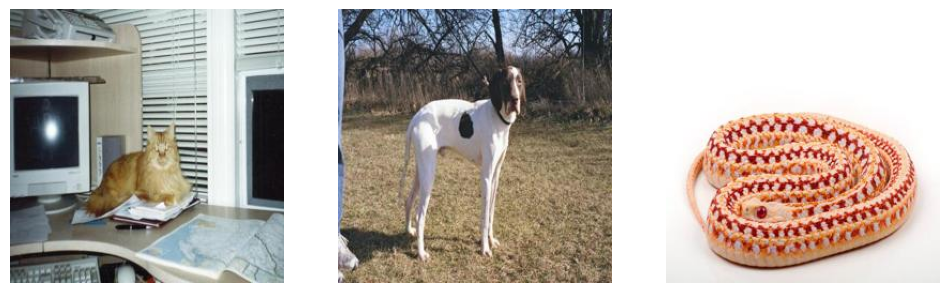

In [97]:
plot_images(validation_images_path, validation_images)

#### Exercise 14

Using `ImageDataGenerator` and `flow_from_directory`, rescale your training, testing, and validation sets. Load and preprocess your images in batches of size $10$.

In [98]:
# Training set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # scale the data
train_image_generator = train_gen.flow_from_directory(train_images_path, 
                                                      target_size=(150, 150), 
                                                      batch_size=10, 
                                                      class_mode='categorical')

# Validation set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # scale the data
val_image_generator = val_gen.flow_from_directory(validation_images_path, 
                                                    target_size=(150, 150), 
                                                    batch_size=10, 
                                                    class_mode='categorical')

# Testing set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # scale the data
test_image_generator = test_gen.flow_from_directory(test_images_path, 
                                                     target_size=(150, 150), 
                                                     batch_size=10, 
                                                     class_mode='categorical')

Found 450 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


#### Exercise 15

Set up a convolutional neural net (CNN) with 7 layers using `Sequential()`. The layers should be as follows:

1. 2D convolutional input layer with a ReLU activation function;
2. Max pooling layer for 2D spatial data;
3. 2D convolutional layer with ReLU activation;
4. Max pooling layer for 2D spatial data;
5. Flattening layer;
6. Dense layer with $128$ units and ReLU activation;
7. Dense output layer with softmax activation.

In [99]:
# Print the class encodings by the generators:
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'cats', 1: 'dogs', 2: 'snakes'}


In [104]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, strides=1, 
                 padding='same', activation='relu', 
                 input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, 
                 padding='same', activation='relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    11,214,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,251,267 (42.92 MB)

 Trainable params: 11,251,267 (42.92 MB)

 Non-trainable params: 0 (0.00 B)

#### Exercise 16

Using Adam and categorical cross-entropy, fit the network you've created and let it run for $12$ epochs.

In [105]:
early_stopping = keras.callbacks.EarlyStopping(patience=12)

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_image_generator, epochs=12, verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch=450//10, validation_steps=450//10, 
                 callbacks=early_stopping)

Epoch 1/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 303ms/step - accuracy: 0.3689 - loss: 1.4600 - val_accuracy: 0.3333 - val_loss: 1.0037
Epoch 2/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.4716 - loss: 0.9554 - val_accuracy: 0.5733 - val_loss: 0.8952
Epoch 3/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 249ms/step - accuracy: 0.5963 - loss: 0.8437 - val_accuracy: 0.5667 - val_loss: 0.8454
Epoch 4/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 244ms/step - accuracy: 0.7915 - loss: 0.5731 - val_accuracy: 0.6467 - val_loss: 1.0345
Epoch 5/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 249ms/step - accuracy: 0.8497 - loss: 0.3765 - val_accuracy: 0.6267 - val_loss: 1.1846
Epoch 6/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 257ms/step - accuracy: 0.9484 - loss: 0.1675 - val_accuracy: 0.6378 - val_loss: 1.2211
Epoch 7/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.9822 - loss: 0.0935 - val_accuracy: 0.6267 - val_loss: 1.5258
Epoch 8/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 254ms/step - accuracy: 0.9759 - loss: 0.0630 - val_accu

#### Exercise 17

Create a plot of the accuracy and loss by the number of epochs.

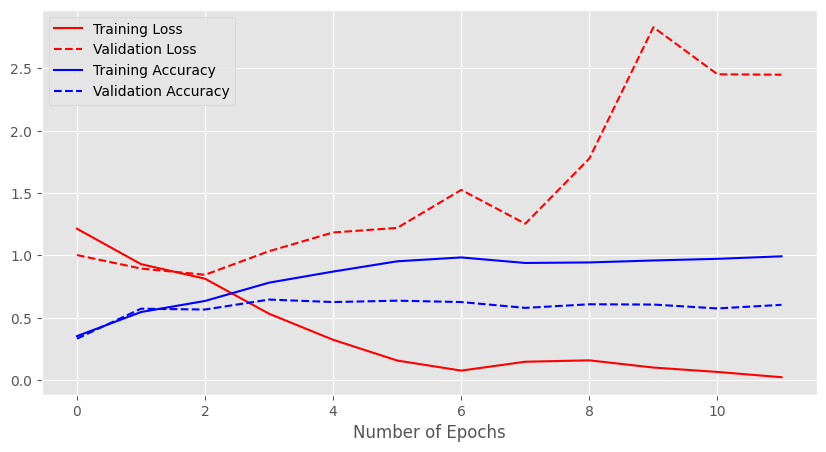

In [106]:
# plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

#### For 234 Students:

#### Exercise 18

Look at your model's accuracy on your testing set. How did it do?

#### Exercise 19

Generate your model's prediction for a random image from the dataset.

#### Exercise 20

Create a confusion matrix using your testing set. Visualize the matrix as a heat map. Which classes was your model best at predicting? Which was it worst at predicting? How do you know?